In [ ]:
# Задача 1
# В этом задании вам снова понадобится ваша виртуальная машина Linux.
# Напишите программу, которая подключается к вашей виртуальной машине по SSH и читает содержимое файла /etc/services.
# Далее, используя регулярные выражения (модуль re), в данных, полученных из этого файла,
# найдите все сетевые сервисы, использующие четырехзначные UDP-порты, начинающиеся с 5-ки.
# Выведите список этих сервисов.

In [109]:
import paramiko
import time
from getpass import getpass
import re

In [110]:
ip = '192.168.56.103'
username = 'maksim'

key_file = r'C:\Users\thena\.ssh\id_rsa'
key_pass = paramiko.RSAKey.from_private_key_file(key_file)

session = paramiko.SSHClient()
session.load_system_host_keys()

session.connect(hostname= ip,
    username= username,
    pkey = key_pass,
    look_for_keys=False,
    )

commands = ['cat /etc/services']
for command in commands:
    print(f"{'#'*1} Executing the Command : {command} {'#'*1}")
    stdin1, stdout1, stderr1 = session.exec_command(command)
    time.sleep(.5)
    result = re.findall(r'\S*\s*\s5\d{3}\/udp', stdout1.read().decode())
    print('\n'.join(result))
    err = stderr1.read().decode()
    if err:
        print(err)

session.close()

# Executing the Command : cat /etc/services #
sip		5060/udp
sip-tls		5061/udp
mdns		5353/udp
amqp		5672/udp
noclog		5354/udp
hostmon		5355/udp
rplay		5555/udp


In [ ]:
# Задача 2
# Используя pandas, прочитайте CSV-данные из вложенного файла SalesJan2009.csv в датафрейм.
# Определите среднее значение цены для всех платежей с Mastercard.
# Постройте графики цен для каждого типа платежного средства
# (суммарное или среднее значение Price за каждый день - на ваше усмотрение).

In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [407]:
df = pd.read_csv('SalesJan2009.csv', delimiter=',')

In [423]:
# now we can call our dataframe with df
df.head(5)

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,...,Account_Created.day-of-month,Account_Created.day-of-week,Account_Created.hour,Account_Created.minute,Last_Login.year,Last_Login.month,Last_Login.day-of-month,Last_Login.day-of-week,Last_Login.hour,Last_Login.minute
0,2009-01-02 06:17:00,Product1,1200,Mastercard,carolina,Basildon,England,United Kingdom,1/2/09 6:00,1/2/09 6:08,...,2,5,6,0,9,1,2,5,6,8
1,2009-01-02 04:53:00,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/09 4:42,1/2/09 7:49,...,2,5,4,42,9,1,2,5,7,49
2,2009-01-02 13:08:00,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/09 16:21,1/3/09 12:32,...,1,4,16,21,9,1,3,6,12,32
3,2009-01-03 14:44:00,Product1,1200,Visa,Gouya,Echuca,Victoria,Australia,9/25/05 21:13,1/3/09 14:22,...,25,7,21,13,9,1,3,6,14,22
4,2009-01-04 12:56:00,Product2,3600,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/09 12:45,...,15,6,15,47,9,1,4,7,12,45


In [424]:
list_of_mastercard_payments = df[df.Payment_Type == 'Mastercard'].Price

In [425]:
print("The average price value for Mastercard =",round(np.mean(list_of_mastercard_payments), 2))

The average price value for Mastercard = 1655.05


In [426]:
# create a copy of the dataframe to preserve the original data
kdf = df

In [427]:
# converting Transaction_date to datatime type
kdf['Transaction_date']=pd.to_datetime(kdf['Transaction_date'])

In [428]:
# so now we can count how many operations was made per day
kdf.groupby(kdf['Transaction_date'].dt.day).count().head(5)

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,...,Account_Created.day-of-month,Account_Created.day-of-week,Account_Created.hour,Account_Created.minute,Last_Login.year,Last_Login.month,Last_Login.day-of-month,Last_Login.day-of-week,Last_Login.hour,Last_Login.minute
Transaction_date,,,,,,,,,,,,,,,,,,,,,
1,27,27,27,27,27,27,26,27,27,27,...,27,27,27,27,27,27,27,27,27,27
2,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
3,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
4,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
5,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47


In [414]:
# group by Payment_type to recognize what type of operations we have
kdf.groupby('Payment_Type').sum()

,Price,Latitude,Longitude,Transaction_date.year,Transaction_date.month,Transaction_date.day-of-month,Transaction_date.day-of-week,Transaction_date.hour,Transaction_date.minute,Account_Created.year,...,Account_Created.day-of-month,Account_Created.day-of-week,Account_Created.hour,Account_Created.minute,Last_Login.year,Last_Login.month,Last_Login.day-of-month,Last_Login.day-of-week,Last_Login.hour,Last_Login.minute
Payment_Type,,,,,,,,,,,,,,,,,,,,,
Amex,188900,4148.863891,-6653.945271,990,110,1616,399,1219,3120,852,...,1618,425,1277,3322,990,181,1690,382,1152,2988
Diners,133800,3749.954997,-3814.952729,801,89,1200,375,960,2676,725,...,1370,333,936,2505,801,142,1478,351,992,2801
Mastercard,458450,10618.053662,-11315.225024,2493,277,4058,1067,2947,8053,2226,...,4115,985,3165,8407,2493,427,4928,1097,3059,7822
Visa,849350,20420.800901,-19471.021392,4698,522,8035,2132,5789,15940,4228,...,8155,2023,5824,15299,4698,848,8270,2010,5559,14858


In [415]:
# sort data for each payment_type
mastercard = kdf[df.Payment_Type == 'Mastercard']
visa = kdf[kdf.Payment_Type == 'Visa']
diners = kdf[kdf.Payment_Type == 'Diners']
amex = kdf[kdf.Payment_Type == 'Amex']

In [416]:
# count how many operations is done in a day
count_master = mastercard.groupby(mastercard['Transaction_date'].dt.day).count().Price
count_visa = visa.groupby(visa['Transaction_date'].dt.day).count().Price
count_diners = diners.groupby(diners['Transaction_date'].dt.day).count().Price
count_amex = amex.groupby(amex['Transaction_date'].dt.day).count().Price

In [417]:
# summarize operations per day
price_master = mastercard.groupby(mastercard['Transaction_date'].dt.day).sum().Price
price_visa = visa.groupby(visa['Transaction_date'].dt.day).sum().Price
price_diners = diners.groupby(diners['Transaction_date'].dt.day).sum().Price
price_amex = amex.groupby(amex['Transaction_date'].dt.day).sum().Price

In [429]:
# calculate the arithmetic mean
master_graphic = price_master / count_master
visa_graphic = price_visa / count_visa
diners_graphic = price_diners / count_diners
amex_graphic = price_amex / count_amex

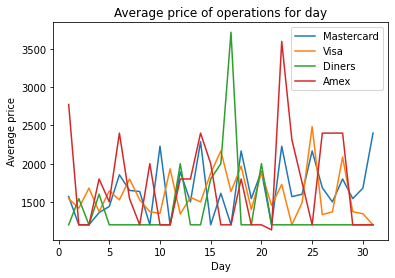

In [430]:
plt.title('Average price of operations for day')
plt.plot(master_graphic)
plt.plot(visa_graphic)
plt.plot(diners_graphic)
plt.plot(amex_graphic)
plt.legend(['Mastercard', 'Visa', 'Diners', 'Amex'])
plt.xlabel('Day')
plt.ylabel('Average price')
plt.show()

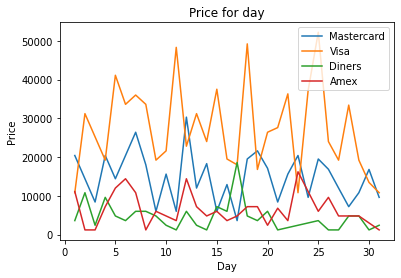

In [431]:
plt.title('Price for day')
plt.plot(price_master)
plt.plot(price_visa)
plt.plot(price_diners)
plt.plot(price_amex)
plt.legend(['Mastercard', 'Visa', 'Diners', 'Amex'])
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()